In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.collections as collections
import numpy as np


In [2]:
from scipy import optimize
import scipy.stats as sci
import seaborn as sns

In [ ]:
matplotlib.use('TkAgg')

In [3]:
factor=np.array([[0.8544241, 0.8785769, 0.8648802, 0.85446554, 0.8644111, 0.8587827], 
                 [0.916992, 0.8762924, 0.8647171, 0.8554492, 0.86298436, 0.8601146],
                 [0.91783875, 0.8781668, 0.86434925, 0.86098033, 0.86274624, 0.8665699], 
                 [0.9165012, 0.88139755, 0.8650095, 0.8611265, 0.8598817, 0.8663014], 
                 [0.91669416, 0.8815861, 0.86524755, 0.855799, 0.8690585, 0.86449784], 
                 [0.9232949, 0.88102436, 0.8662188, 0.8620197, 0.8549578, 0.86791706], 
                 [0.91918445, 0.8709886, 0.8660511, 0.8621063, 0.8547549, 0.8681659],
                 [0.9165108, 0.88109314, 0.86583996, 0.8616185, 0.861313, 0.85870004], 
                 [0.9192637, 0.8763593, 0.88153267, 0.8815497, 0.8762898, 0.8697507], 
                 [0.91291535, 0.87855124, 0.8762137, 0.8774973, 0.8775468, 0.867754], 
                 [0.9216925, 0.87625736, 0.88192517, 0.8837421, 0.87624615, 0.8702918], 
                 [0.9166356, 0.8781437, 0.8792285, 0.88348377, 0.8781248, 0.8709041], 
                 [0.90662056, 0.8798001, 0.8708528, 0.8716133, 0.8787056, 0.86818427], 
                 [0.9076543, 0.87958145, 0.8716606, 0.8732651, 0.879587, 0.8712834], 
                 [0.9071888, 0.8879362, 0.8710524, 0.87179905, 0.8878198, 0.8777878]]
)

In [4]:
factor=factor.T


In [5]:
print(factor)

[[0.8544241  0.916992   0.91783875 0.9165012  0.91669416 0.9232949
  0.91918445 0.9165108  0.9192637  0.91291535 0.9216925  0.9166356
  0.90662056 0.9076543  0.9071888 ]
 [0.8785769  0.8762924  0.8781668  0.88139755 0.8815861  0.88102436
  0.8709886  0.88109314 0.8763593  0.87855124 0.87625736 0.8781437
  0.8798001  0.87958145 0.8879362 ]
 [0.8648802  0.8647171  0.86434925 0.8650095  0.86524755 0.8662188
  0.8660511  0.86583996 0.88153267 0.8762137  0.88192517 0.8792285
  0.8708528  0.8716606  0.8710524 ]
 [0.85446554 0.8554492  0.86098033 0.8611265  0.855799   0.8620197
  0.8621063  0.8616185  0.8815497  0.8774973  0.8837421  0.88348377
  0.8716133  0.8732651  0.87179905]
 [0.8644111  0.86298436 0.86274624 0.8598817  0.8690585  0.8549578
  0.8547549  0.861313   0.8762898  0.8775468  0.87624615 0.8781248
  0.8787056  0.879587   0.8878198 ]
 [0.8587827  0.8601146  0.8665699  0.8663014  0.86449784 0.86791706
  0.8681659  0.85870004 0.8697507  0.867754   0.8702918  0.8709041
  0.86818427 

In [6]:
energy=np.array([[-117.562809, -117.654067, -117.773034, -117.546568, -117.561171, -117.654743],
                 [-124.996465, -124.53856, -124.285282, -124.705229, -124.66431, -124.547956], 
                 [-123.236265, -122.526418, -122.076365, -122.741413, -122.843914, -122.712861], 
                 [-119.056884, -118.744861, -118.321717, -118.349477, -118.864611, -118.523058], 
                 [-117.571395, -116.240507, -116.068417, -116.141414, -116.621272, -116.160304], 
                 [-112.130796, -111.188208, -111.250764, -111.719731, -111.620518, -111.159266], 
                 [-106.504003, -105.338886, -105.372911, -105.835458, -106.056878, -105.62589], 
                 [-100.255096, -100.027884, -99.962232, -100.130554, -100.130992, -99.862988], 
                 [-116.253054, -114.059884, -113.846531, -116.182403, -114.972511, -114.65301], 
                 [-116.300634, -113.868393, -113.668683, -116.221639, -114.799678, -114.538951], 
                 [-111.196849, -111.224296, -110.960191, -110.848155, -110.769385, -111.113374],
                 [-107.36029, -107.38633, -106.923945, -107.082555, -107.154567, -107.276491], 
                 [-120.425391, -118.137468, -117.49989, -119.14965, -118.67455, -118.097554], 
                 [-119.401685, -116.375129, -115.390574, -117.802734, -117.388923, -116.405085], 
                 [-120.427911, -116.988485, -115.991751, -118.767877, -118.124454, -117.114693]]
)

In [7]:
energy=energy.T

In [8]:
energy=energy*(1/40)

In [9]:
print(energy)

[[-2.93907023 -3.12491163 -3.08090663 -2.9764221  -2.93928488 -2.8032699
  -2.66260008 -2.5063774  -2.90632635 -2.90751585 -2.77992123 -2.68400725
  -3.01063478 -2.98504213 -3.01069778]
 [-2.94135167 -3.113464   -3.06316045 -2.96862153 -2.90601267 -2.7797052
  -2.63347215 -2.5006971  -2.8514971  -2.84670983 -2.7806074  -2.68465825
  -2.9534367  -2.90937823 -2.92471213]
 [-2.94432585 -3.10713205 -3.05190912 -2.95804293 -2.90171043 -2.7812691
  -2.63432278 -2.4990558  -2.84616328 -2.84171708 -2.77400477 -2.67309863
  -2.93749725 -2.88476435 -2.89979378]
 [-2.9386642  -3.11763073 -3.06853533 -2.95873693 -2.90353535 -2.79299328
  -2.64588645 -2.50326385 -2.90456008 -2.90554098 -2.77120388 -2.67706387
  -2.97874125 -2.94506835 -2.96919693]
 [-2.93902928 -3.11660775 -3.07109785 -2.97161528 -2.9155318  -2.79051295
  -2.65142195 -2.5032748  -2.87431277 -2.86999195 -2.76923463 -2.67886418
  -2.96686375 -2.93472308 -2.95311135]
 [-2.94136858 -3.1136989  -3.06782153 -2.96307645 -2.9040076  -2.778

In [10]:
def triatpos(pos=(0,0), rot=0):
    r=np.array([[-1,-1],[1,-1],[1,1],[-1,-1]])*0.5
    rm=[[np.cos(np.deg2rad(rot)),-np.sin(np.deg2rad(rot))],[np.sin(np.deg2rad(rot)),np.cos(np.deg2rad(rot))]]
    r=np.dot(rm,r.T).T
    r[:,0] += pos[0]
    r[:,1] += pos[1]
    return r

def triamatrix(a,ax,rot=0,cmap=plt.cm.viridis,**kwargs):
    segs=[]
    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            segs.append(triatpos((j,i), rot=rot))
    col=collections.PolyCollection(segs,cmap=cmap,**kwargs)
    col.set_array(a.flatten())
    ax.add_collection(col)
    return col

In [11]:
name=('Cs2SnCaI6','Cs2SnTiI6','Cs2SnVI6','Cs2SnMnI6','Cs2SnFeI6','Cs2SnNiI6','Cs2SnCuI6','Cs2SnZnI6','Cs2AgSbBr6','Cs2AgBiBr6','Cs2AgInBr6','Cs2AgTlBr6','Cs2InBiBr6','Cs2TlSbBr6','Cs2TlBiBr6')

In [12]:
plt.style.use('classic')

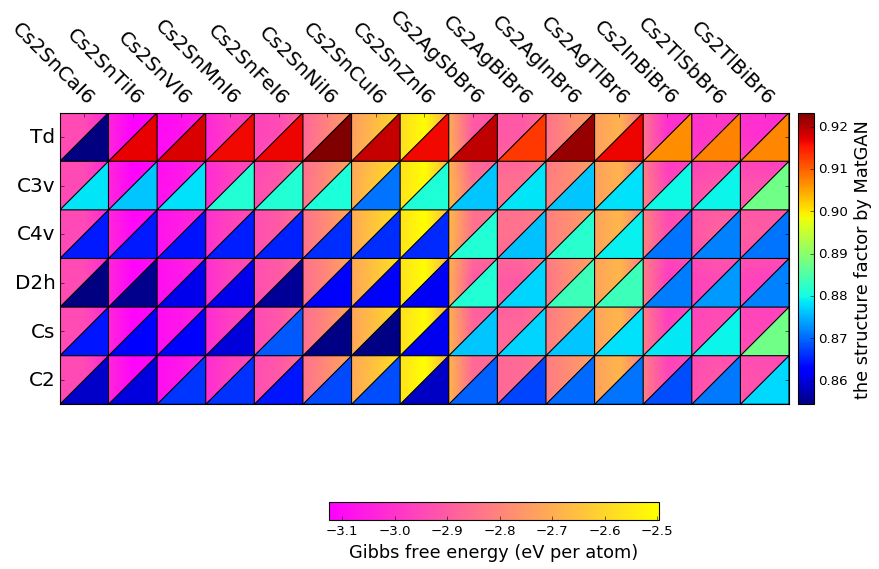

In [14]:
font={
      'size':16,
     }
font1={

      'size':16,
     }
fontGibbs={

      'size':16,
     }
norm=matplotlib.colors.Normalize(vmin=-3.2,vmax=-2.5,)
gird_x,grid_y=np.mgrid[0:6:1,0:15:1]

figsize=14,8
fig,ax=plt.subplots(facecolor='white',figsize=figsize)
im1=ax.imshow(energy,cmap='spring',)

#yyy=plt.gca()
#yyy.set_xticks(np.linspace(0,15,16),rotation=60)
#yyy.set_xticklabels(('Cs2TlAgBr6','Cs2AgSbBr6','Cs2AgBiBr6','Cs2TlBiBr6','Cs2TlSbBr6','Cs2InBiBr6','Cs2InAgBr6','Cs2SnCuI6','Cs2SnVI6','Cs2SnCaI6','Cs2SnMnI6','Cs2SnTiI6','Cs2SnFeI6','Cs2SnZnI6','Cs2SnNiI6'))
im2=triamatrix(factor,ax,rot=90,cmap="jet",)
#position=fig.add_axes([0.15,0.05,0.7,0.03])

cbar=fig.colorbar(im1,ax=ax,pad=0.1,shrink=0.38,aspect=18,orientation='horizontal')#fraction=0.05,
cbar.set_label('''Gibbs free energy (eV per atom)''',fontdict=fontGibbs)
cbar.set_ticks(np.linspace(-3.2,-2.5,8))#fontdict=font
#fig.gca().grid(which='minor',color='w',linestyle='-',linewidth=15)
#print(dir(cbar))
#cbar._edges='k'
#cbar.linewidths='3'
cbar2=fig.colorbar(im2,ax=ax,pad=0.01,shrink=0.76,aspect=18,)#extend='both'orientation='horizontal'
#cbar2._edges='k'
cbar2.set_ticks(np.linspace(0.85,0.92,8))
cbar2.set_label('''the structure factor by MatGAN''',fontdict=font1)#fontdict=font
#im1.tick_params(top=True)
plt.xticks(range(0,15),name,rotation=315,ha='right',rotation_mode='anchor',)
plt.yticks(range(0,6),('Td','C3v','C4v','D2h','Cs','C2'),)
plt.tick_params(top=True,bottom=False,labeltop=True,labelbottom=False,labelsize=18)
#yyy=plt.gca()
#yyy.set_yticks(np.linspace(0,6,6))
#yyy.set_yticklabels(('C4v','C2','C3v','D2h','Cs','Td'))
plt.grid(False)
#plt.savefig('0408_n_1.png',dpi=300)
plt.show()

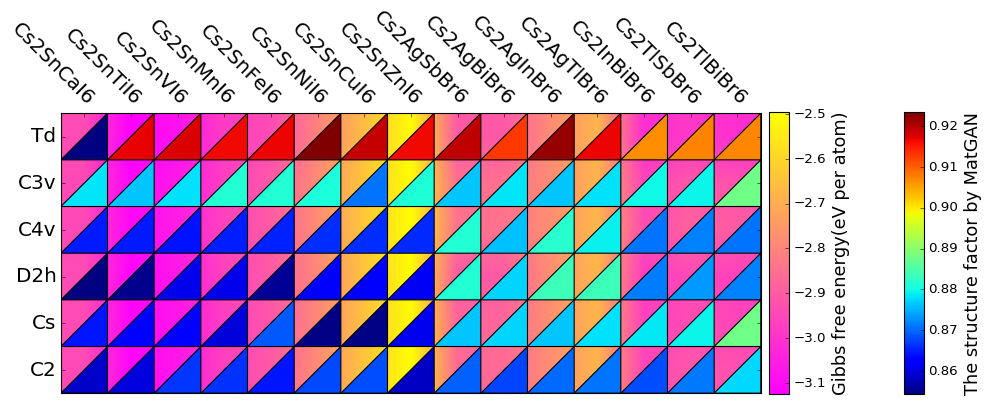

In [34]:
font={
      'size':16,
     }
font1={

      'size':16,
     }
fontGibbs={

      'size':16,
     }
norm=matplotlib.colors.Normalize(vmin=-3.2,vmax=-2.5,)
gird_x,grid_y=np.mgrid[0:6:1,0:15:1]

figsize=16,10
fig,ax=plt.subplots(facecolor='white',figsize=figsize)
im1=ax.imshow(energy,cmap='spring',)

#yyy=plt.gca()
#yyy.set_xticks(np.linspace(0,15,16),rotation=60)
#yyy.set_xticklabels(('Cs2TlAgBr6','Cs2AgSbBr6','Cs2AgBiBr6','Cs2TlBiBr6','Cs2TlSbBr6','Cs2InBiBr6','Cs2InAgBr6','Cs2SnCuI6','Cs2SnVI6','Cs2SnCaI6','Cs2SnMnI6','Cs2SnTiI6','Cs2SnFeI6','Cs2SnZnI6','Cs2SnNiI6'))
im2=triamatrix(factor,ax,rot=90,cmap="jet",)
#position=fig.add_axes([0.15,0.05,0.7,0.03])
cbar2=fig.colorbar(im2,ax=ax,pad=0.01,shrink=0.44,aspect=14)#extend='both'orientation='horizontal'
#cbar2._edges='k'
cbar2.set_ticks(np.linspace(0.85,0.92,8))
cbar2.set_label('''The structure factor by MatGAN''',fontdict=font1)#fontdict=font
cbar=fig.colorbar(im1,ax=ax,pad=0.01,shrink=0.44,aspect=14,)#fraction=0.05orientation='horizontal',
cbar.set_label('''Gibbs free energy(eV per atom)''',fontdict=fontGibbs)
cbar.set_ticks(np.linspace(-3.2,-2.5,8))#fontdict=font
#fig.gca().grid(which='minor',color='w',linestyle='-',linewidth=15)
#print(dir(cbar))
#cbar._edges='k'
#cbar.linewidths='3'

#im1.tick_params(top=True)
plt.xticks(range(0,15),name,rotation=315,ha='right',rotation_mode='anchor',)
plt.yticks(range(0,6),('Td','C3v','C4v','D2h','Cs','C2'),)
plt.tick_params(top=True,bottom=False,labeltop=True,labelbottom=False,labelsize=18)
#yyy=plt.gca()
#yyy.set_yticks(np.linspace(0,6,6))
#yyy.set_yticklabels(('C4v','C2','C3v','D2h','Cs','Td'))
plt.grid(False)
plt.savefig('0506.svg',dpi=300)
plt.show()

In [54]:
line_c4v_energy=np.array([-2.93907023,-3.12491163,-3.08090663,-2.9764221,-2.93928488,-2.8032699,-2.66260008,-2.506377])#,-2.90632635,-2.90751585,-2.77992123,-2.68400725,-3.01063478,-2.98504213,-3.01069778])
#line_c4v_energy
line_c4v_GANs=np.array([0.8544241,0.916992,0.91783875,0.9165012,0.91669416,0.9232949,0.91918445,0.9165108])#,0.9192637,0.91291535, 0.9216925,0.9166356,0.90662056,0.9076543,0.9071888])

/home/hjj/anaconda3/envs/tensorflow/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


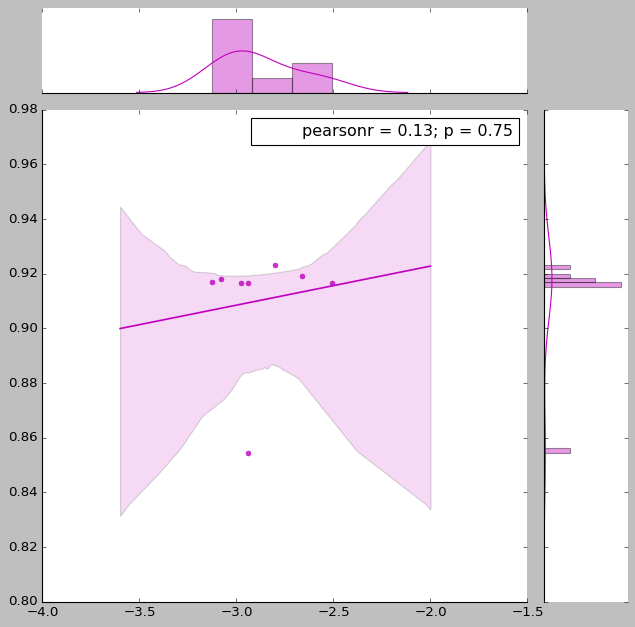

In [55]:
corelation={'Gibbs':line_c4v_energy,'GANs':np.asarray(line_c4v_GANs)}
sns.jointplot("Gibbs","GANs",data=corelation,kind="reg",color="m",height=8,stat_func=sci.pearsonr)

In [49]:
row2_energy=np.array([-124.996465, -124.53856, -124.285282, -124.705229, -124.66431, -124.547956])
row2_GANS=np.array([0.916992, 0.8762924, 0.8647171, 0.8554492, 0.86298436, 0.8601146])

/home/hjj/anaconda3/envs/tensorflow/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


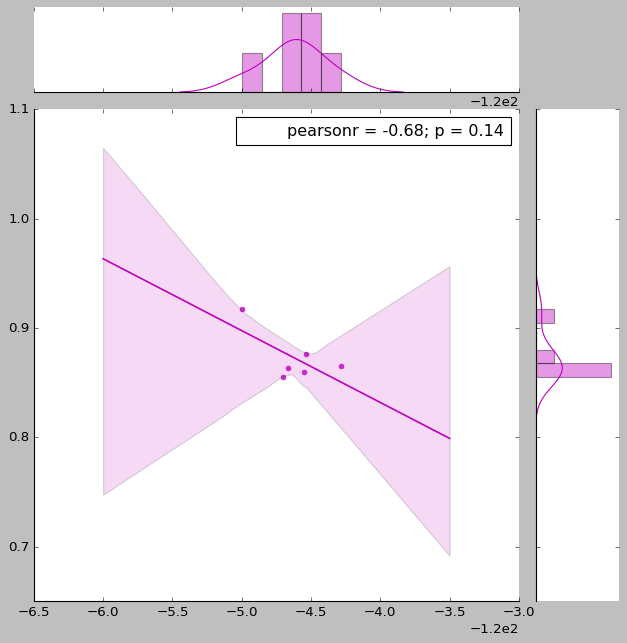

In [51]:
corelation_row2={'Gibbs':row2_energy,'GANs':np.asarray(row2_GANS)}
sns.jointplot("Gibbs","GANs",data=corelation_row2,kind="reg",color="m",height=8,stat_func=sci.pearsonr)